## Полянчиков Владислав АБД19-1м Лекция 1

(Также содержит задание из второй лекции по mnist (ниже)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

from PIL import Image
import matplotlib.pyplot as plt

from tensorflow import keras
import keras.layers as layers
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.optimizers import SGD

print("Setup Complete")

Setup Complete


### Задание 1 (для MNIST)
1. Добавить скрытые слои
2. Добавить Dropout
3. Сравнить точность вычислений обеих сеток

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

6


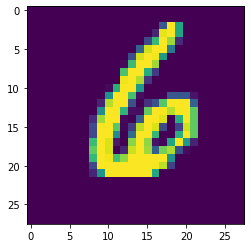

In [ ]:
idx = 155
print(y_train[idx])
plt.imshow(X_train[idx]);

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
np.random.seed(42)

In [ ]:
NB_EPOCH = 200 
BATCH_SIZE = 128 
VERBOSE = 1 
NB_CLASSES = 10
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test2 = X_test.copy()
y_test2 = y_test.copy()
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

y_train = keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = keras.utils.to_categorical(y_test, NB_CLASSES)

In [ ]:
print(X_train.shape[0], 'train_samples')
print(X_test.shape[0], 'test_samples')

60000 train_samples
10000 test_samples


In [ ]:
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(RESHAPED, )))

model.add(Dense(320, activation='relu', input_shape=(20,)))
model.add(Dropout(0.5))
model.add(Dense(160, activation='relu', input_shape=(320,)))
model.add(Dropout(0.5))
model.add(Dense(40, activation='relu', input_shape=(160,)))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES, activation='softmax', input_shape=(40,)))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

model.fit(X_train, y_train, batch_size=100, epochs=20, verbose = 1, validation_split=0.3)

Epoch 1/20
420/420 [==============================] - 2s 5ms/step - loss: 0.9045 - accuracy: 0.7047 - val_loss: 0.3005 - val_accuracy: 0.9151
Epoch 2/20
420/420 [==============================] - 2s 5ms/step - loss: 0.4082 - accuracy: 0.8973 - val_loss: 0.2490 - val_accuracy: 0.9316
Epoch 3/20
420/420 [==============================] - 2s 5ms/step - loss: 0.3260 - accuracy: 0.9205 - val_loss: 0.2091 - val_accuracy: 0.9418
Epoch 4/20
420/420 [==============================] - 2s 5ms/step - loss: 0.2895 - accuracy: 0.9276 - val_loss: 0.2107 - val_accuracy: 0.9436
Epoch 5/20
420/420 [==============================] - 2s 5ms/step - loss: 0.2599 - accuracy: 0.9355 - val_loss: 0.1946 - val_accuracy: 0.9484
Epoch 6/20
420/420 [==============================] - 2s 5ms/step - loss: 0.2313 - accuracy: 0.9433 - val_loss: 0.1921 - val_accuracy: 0.9522
Epoch 7/20
420/420 [==============================] - 2s 5ms/step - loss: 0.2172 - accuracy: 0.9466 - val_loss: 0.1786 - val_accuracy: 0.9531
Epoch 

Predicted value:  7
Actual value:  7


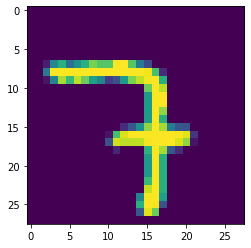

In [ ]:
idx = 703
print('Predicted value: ', np.argmax(model.predict(X_test)[idx]))
print('Actual value: ', np.argmax(y_test[idx]))
plt.imshow(X_test2[idx]);

In [ ]:
pr = model.predict(X_test)

In [ ]:
print([np.argmax(i) for i in pr[:5]])

print([np.argmax(i) for i in y_test[:5]])

[7, 2, 1, 0, 4]
[7, 2, 1, 0, 4]


In [ ]:
pr.shape

(60000, 10)

### Задание по лекции 2

1. создайте сверточную сеть для классификации данных mnist,
оцените точность полученных результатов и ошибки по классам.
Сохраните модель, сохраните наиболее эффективные веса.

In [ ]:
num_classes=10

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test2 = X_test.copy()
y_test2 = y_test.copy()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

y_train = keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = keras.utils.to_categorical(y_test, NB_CLASSES)

In [ ]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_train, -1)

In [ ]:
model = Sequential()
keras.Input(shape=(28,28,1)),
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(NB_CLASSES, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics='accuracy')

model.fit(X_train, y_train, batch_size=25, epochs=15, verbose = 1, validation_split=0.3)

Epoch 1/15
1680/1680 [==============================] - 53s 32ms/step - loss: 0.7063 - accuracy: 0.7756 - val_loss: 0.2580 - val_accuracy: 0.9342
Epoch 2/15
1680/1680 [==============================] - 53s 32ms/step - loss: 0.2388 - accuracy: 0.9277 - val_loss: 0.1702 - val_accuracy: 0.9563
Epoch 3/15
1680/1680 [==============================] - 53s 32ms/step - loss: 0.1794 - accuracy: 0.9457 - val_loss: 0.1346 - val_accuracy: 0.9640
Epoch 4/15
1680/1680 [==============================] - 54s 32ms/step - loss: 0.1492 - accuracy: 0.9543 - val_loss: 0.1163 - val_accuracy: 0.9692
Epoch 5/15
1680/1680 [==============================] - 54s 32ms/step - loss: 0.1323 - accuracy: 0.9600 - val_loss: 0.1053 - val_accuracy: 0.9722
Epoch 6/15
1680/1680 [==============================] - 53s 32ms/step - loss: 0.1204 - accuracy: 0.9639 - val_loss: 0.1060 - val_accuracy: 0.9718
Epoch 7/15
1680/1680 [==============================] - 54s 32ms/step - loss: 0.1099 - accuracy: 0.9660 - val_loss: 0.0874 -

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (25, 26, 26, 32)          320       
_________________________________________________________________
dropout_24 (Dropout)         (25, 26, 26, 32)          0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (25, 13, 13, 32)          0         
_________________________________________________________________
dropout_25 (Dropout)         (25, 13, 13, 32)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (25, 11, 11, 64)          18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (25, 5, 5, 64)            0         
_________________________________________________________________
flatten_9 (Flatten)          (25, 1600)              

### 3. Продемонстрируйте работу обратных вызовов в процессе обучения

In [ ]:
from tensorflow.keras.models import load_model
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
model = load_model('my_model')

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.fit(X_train, y_train, batch_size=25, epochs=15, verbose = 1, callbacks=[callback], validation_split=0.3)

Epoch 1/15
1680/1680 [==============================] - 53s 32ms/step - loss: 0.0753 - accuracy: 0.9768 - val_loss: 0.0628 - val_accuracy: 0.9834
Epoch 2/15
1680/1680 [==============================] - 53s 32ms/step - loss: 0.0709 - accuracy: 0.9783 - val_loss: 0.0608 - val_accuracy: 0.9836
Epoch 3/15
1680/1680 [==============================] - 53s 32ms/step - loss: 0.0696 - accuracy: 0.9783 - val_loss: 0.0618 - val_accuracy: 0.9837
Epoch 4/15
1680/1680 [==============================] - 53s 31ms/step - loss: 0.0667 - accuracy: 0.9793 - val_loss: 0.0596 - val_accuracy: 0.9841
Epoch 5/15
1680/1680 [==============================] - 53s 31ms/step - loss: 0.0658 - accuracy: 0.9796 - val_loss: 0.0597 - val_accuracy: 0.9838
Epoch 6/15
1680/1680 [==============================] - 58s 35ms/step - loss: 0.0639 - accuracy: 0.9804 - val_loss: 0.0589 - val_accuracy: 0.9837
Epoch 7/15
1680/1680 [==============================] - 53s 32ms/step - loss: 0.0638 - accuracy: 0.9801 - val_loss: 0.0563 -

In [ ]:
model.fit(X_train, y_train, batch_size=50, epochs=15, verbose = 1, callbacks=[callback], validation_split=0.3)

Epoch 1/15
840/840 [==============================] - 48s 58ms/step - loss: 0.0499 - accuracy: 0.9839 - val_loss: 0.0472 - val_accuracy: 0.9864
Epoch 2/15
840/840 [==============================] - 49s 58ms/step - loss: 0.0488 - accuracy: 0.9850 - val_loss: 0.0468 - val_accuracy: 0.9866
Epoch 3/15
840/840 [==============================] - 48s 57ms/step - loss: 0.0475 - accuracy: 0.9849 - val_loss: 0.0464 - val_accuracy: 0.9865
Epoch 4/15
840/840 [==============================] - 48s 57ms/step - loss: 0.0469 - accuracy: 0.9853 - val_loss: 0.0461 - val_accuracy: 0.9866
Epoch 5/15
840/840 [==============================] - 48s 57ms/step - loss: 0.0488 - accuracy: 0.9842 - val_loss: 0.0465 - val_accuracy: 0.9862
Epoch 6/15
840/840 [==============================] - 48s 57ms/step - loss: 0.0473 - accuracy: 0.9856 - val_loss: 0.0463 - val_accuracy: 0.9866
Epoch 7/15
840/840 [==============================] - 48s 58ms/step - loss: 0.0457 - accuracy: 0.9855 - val_loss: 0.0469 - val_accuracy:

#### А вот и callback!


In [ ]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


### Задание 2 (Лекция 1)
Взять произвольную функцию четырех (8,12) аргументов и аппроксимировать ее
нейронной сетью. Какова оптимальная глубина сети для каждого количества аргументов,
если функция линейная, квадратичная, трансцендентная, как связано количество
аргументов и глубина сети?

In [ ]:
np.random.seed(42)
m = 1000
x1 = 6 * np.random.rand(m, 1) - 3

y = 2.5 * x1**4 -10 * x1**3 + 3.33 * x1**2 + 3 * x1 + 20 + np.random.randn(m, 1)

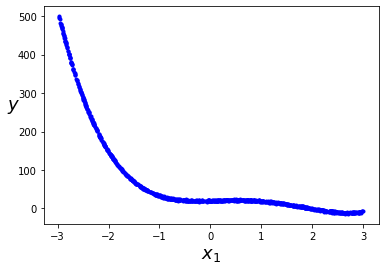

In [ ]:
plt.plot(x1, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
#plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x1, y)
lin_reg.intercept_, lin_reg.coef_

(array([72.13819687]), array([[-52.34773391]]))

In [ ]:
X_new = np.array([[-3.5], [3]])
y_new = lin_reg.predict(X_new)
y_new

array([[255.35526556],
       [-84.90500486]])

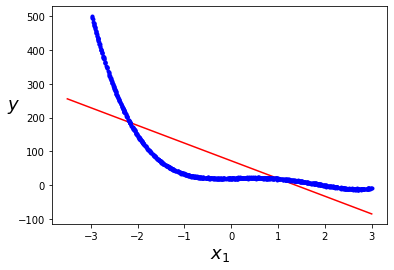

In [ ]:
plt.plot(X_new, y_new, 'r-')
plt.plot(x1, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
#plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(x1)
x1[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654, -0.42654845,  0.32108831])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([20.20167625]),
 array([[  3.01079196,   3.24399685, -10.0069303 ,   2.50957213]]))

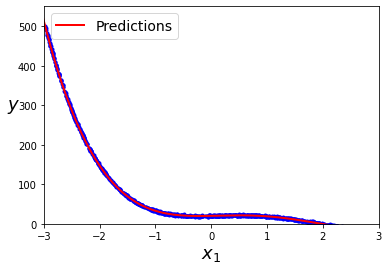

In [ ]:
X_new=np.linspace(-4, 3, 1000).reshape(1000, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(x1, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 550])
plt.show()

### Уже без участия нейронной сети линейная модель с помощью модуля PolynomialFeatures хорошо справляется с ситуацией

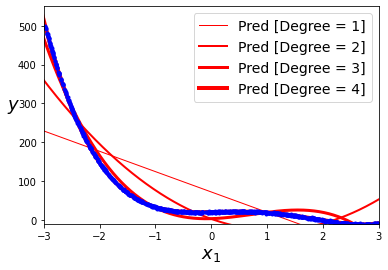

In [ ]:
for degree in range(1, 5):
  poly_features = PolynomialFeatures(degree=degree, include_bias=False)
  X_poly = poly_features.fit_transform(x1)
  lin_reg = LinearRegression()
  lin_reg.fit(X_poly, y)
  X_new=np.linspace(-4, 3, 1000).reshape(1000, 1)
  X_new_poly = poly_features.transform(X_new)
  y_new = lin_reg.predict(X_new_poly)
  plt.plot(X_new, y_new, "r-", linewidth=1 * degree, label="Pred [Degree = {}]".format(degree))

plt.plot(x1, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)
plt.axis([-3, 3, -10, 550])
plt.show()

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

from PIL import Image
import matplotlib.pyplot as plt

from tensorflow import keras
import keras.layers as layers
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.optimizers import SGD

print("Setup Complete")

Setup Complete


In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [26]:
np.random.seed(42)
x=[]
for i in range(100):
    x.append([np.random.uniform(0,100) for j in range(4)])
y=[]
for i in range(100):
    y.append(2.5*x[i][0] + 2*x[i][1] + 3.33*x[i][2] + x[i][3])

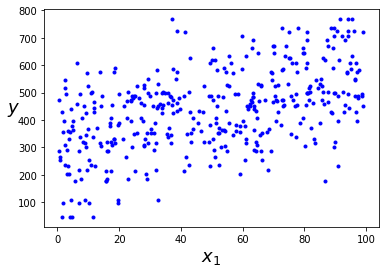

In [27]:
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [28]:
x = np.array(x)
y = np.array(y)

x.shape, y.shape

((100, 4), (100,))

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [7]:
#x = sc.fit_transform(x)

In [29]:
model = Sequential()
model.add(Dense(40, activation='relu',kernel_initializer='uniform', input_shape=(4, )))

model.add(Dense(20, activation='relu',kernel_initializer='uniform', input_shape=(40,)))

model.add(Dense(1, activation='relu', input_shape=(20,)))

In [30]:
model.compile(loss='mse', optimizer='adam')

h = model.fit(x, y, batch_size=10, epochs=300, verbose = 1, validation_split=0.3)

Epoch 1/300
7/7 [==============================] - 0s 13ms/step - loss: 215251.2031 - val_loss: 203813.7656
Epoch 2/300
7/7 [==============================] - 0s 3ms/step - loss: 213373.1875 - val_loss: 201568.9062
Epoch 3/300
7/7 [==============================] - 0s 3ms/step - loss: 210438.1094 - val_loss: 197872.2344
Epoch 4/300
7/7 [==============================] - 0s 4ms/step - loss: 205583.0000 - val_loss: 192354.9844
Epoch 5/300
7/7 [==============================] - 0s 4ms/step - loss: 198754.0469 - val_loss: 184541.5000
Epoch 6/300
7/7 [==============================] - 0s 4ms/step - loss: 189497.4531 - val_loss: 174033.0938
Epoch 7/300
7/7 [==============================] - 0s 3ms/step - loss: 176908.0469 - val_loss: 160634.3125
Epoch 8/300
7/7 [==============================] - 0s 3ms/step - loss: 161528.1250 - val_loss: 144010.6719
Epoch 9/300
7/7 [==============================] - 0s 3ms/step - loss: 142734.9219 - val_loss: 124687.5156
Epoch 10/300
7/7 [==================

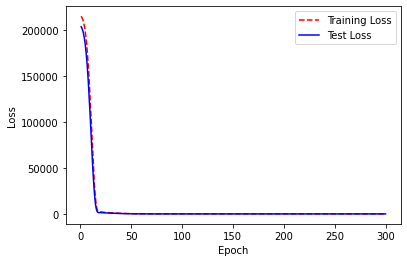

In [31]:
training_loss = h.history['loss']
test_loss = h.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();